# NLP (HW1)
## Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive


### Clone Project from Github

In [1]:
!git clone 'https://github.com/mirzanahal/Persian-Gender-Recognition'

Cloning into 'Persian-Gender-Recognition'...
remote: Enumerating objects: 2607, done.
remote: Counting objects: 100% (2607/2607), done.
remote: Compressing objects: 100% (2505/2505), done.
remote: Total 2607 (delta 141), reused 2523 (delta 68), pack-reused 0
Receiving objects: 100% (2607/2607), 31.49 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (141/141), done.


### Install Requirement

In [2]:
!pip install -r Persian-Gender-Recognition/requirement.txt

     |████████████████████████████████| 184kB 33.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 317kB 45.8MB/s 
     |████████████████████████████████| 122kB 47.4MB/s 
     |████████████████████████████████| 788kB 44.3MB/s 
     |████████████████████████████████| 122kB 43.5MB/s 
     |████████████████████████████████| 235kB 44.3MB/s 
     |████████████████████████████████| 10.3MB 25.9MB/s 
     |████████████████████████████████| 1.4MB 35.3MB/s 
     |████████████████████████████████| 15.3MB 322kB/s 
     |████████████████████████████████| 9.9MB 40.7MB/s 
     |████████████████████████████████| 2.2MB 40.6MB/s 
     |████████████████████████████████| 368kB 44.0MB/s 
     |████████████████████████████████| 993kB 42.9MB/s 
     |████████████████████████████████| 512kB 44.3MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 27.4MB 163k

### Set Directory

In [3]:
%cd Persian-Gender-Recognition/code

/content/Persian-Gender-Recognition/code


## Import 

In [111]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

## Load Train Datasets

In [54]:
embedding_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'embedding_fasttext.csv'), index_col=0)
print(embedding_features.head())

         F0        F1        F2        F3  ...      F298      F299  number  label
0 -0.016724  0.017616  0.009455 -0.013369  ... -0.015635  0.018951     289      0
1 -0.058125  0.009000  0.011841 -0.012871  ... -0.028773  0.014173     504      0
2  0.000008  0.030201 -0.010074 -0.028357  ...  0.001973 -0.019890     262      0
3  0.023368  0.074310  0.004460 -0.041999  ... -0.010022 -0.024235     276      0
4 -0.014248  0.029315  0.000213 -0.018357  ... -0.008050 -0.025579     510      0

[5 rows x 302 columns]


In [55]:
psychological_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'psychological_features.csv'), index_col=0)
print(psychological_features.head())

   PSY_F36  PSY_F37  PSY_F38  PSY_F39  PSY_F47  PSY_F48  number  label
0       25       16        0        0        0        0     289      0
1        2        5        0        1        0        2     504      0
2       19       16        0        0        0        0     262      0
3        7        9        0        0        0        0     276      0
4       33       44        0        4        0        0     510      0


In [56]:
structural_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'structural_features.csv'), index_col=0)
print(structural_features.head())

   STR_F25  STR_F26  STR_F27  STR_F28  STR_F29  number  label
0        1        1     55.0      0.0    122.5     289      0
1        0        1     18.0      0.0     92.0     504      0
2        1        1     53.0      0.0    117.5     262      0
3        0        1     20.0      0.0     80.0     276      0
4        1       10     14.3      0.0    276.5     510      0


In [57]:
syntactics_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'syntactics_features.csv'), index_col=0)
print(syntactics_features.head())

   SYN_F18   SYN_F19  SYN_F20  SYN_F21  ...   SYN_F23   SYN_F24  number  label
0      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     289      0
1      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     504      0
2      0.0  0.000000      0.0      0.0  ...  0.012766  0.004255     262      0
3      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     276      0
4      0.0  0.018083      0.0      0.0  ...  0.000000  0.000000     510      0

[5 rows x 9 columns]


In [58]:
text_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'text_dependent_features.csv'), index_col=0)
print(text_dependent_features.head())

   TD_F1     TD_F2  TD_F49  TD_F3     TD_F4  TD_F5     TD_F6  number  label
0    245  0.102041      25      1  0.179592    0.0  0.012245     289      0
1     92  0.217391      20      2  0.163043    0.0  0.000000     504      0
2    235  0.110638      26      3  0.195745    0.0  0.012766     262      0
3     80  0.250000      20      1  0.212500    0.0  0.000000     276      0
4    553  0.048825      27     16  0.249548    0.0  0.018083     510      0


In [59]:
word_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'word_dependent_features.csv'), index_col=0)
print(word_dependent_features.head())

   WD_F7     WD_F8     WD_F9    WD_F10  ...       WD_F17    WD_F50  number  label
0     55  4.454545  0.763636  0.600000  ...  1870.088820  3.635431     289      0
1     18  5.111111  0.888889  0.611111  ...  2312.297406  2.736339     504      0
2     53  4.433962  0.830189  0.660377  ...  2495.612060  3.715138     262      0
3     20  4.000000  0.950000  0.800000  ...  5691.891320  2.926418     276      0
4    143  3.867133  0.601399  0.608392  ...  2134.023191  4.147394     510      0

[5 rows x 14 columns]


In [ ]:
grammatical_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'grammatical_features.csv'), index_col=0)
print(grammatical_features.head())

## Generate Train Features

In [60]:
features_list = [embedding_features, psychological_features, structural_features, syntactics_features, text_dependent_features, word_dependent_features, grammatical_features]

features = features_list.pop()
for feature in features_list:
  features = pd.merge(features, feature, left_on=['label', 'number'], right_on=['label', 'number'])

print(features.head())
print(features.shape)

   WD_F7     WD_F8     WD_F9    WD_F10  ...  TD_F3     TD_F4  TD_F5     TD_F6
0     55  4.454545  0.763636  0.600000  ...      1  0.179592    0.0  0.012245
1     18  5.111111  0.888889  0.611111  ...      2  0.163043    0.0  0.000000
2     53  4.433962  0.830189  0.660377  ...      3  0.195745    0.0  0.012766
3     20  4.000000  0.950000  0.800000  ...      1  0.212500    0.0  0.000000
4    143  3.867133  0.601399  0.608392  ...     16  0.249548    0.0  0.018083

[5 rows x 339 columns]
(2000, 339)


## Split X, y

In [61]:
y = features['label']
X = features.drop(['label', 'number'], axis=1)

## Normalize

In [62]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Feature Importance

In [63]:
classifier = Classifier('Random Forest', n_estimator=300)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

In [64]:
pip install matplotlib==3.1.3

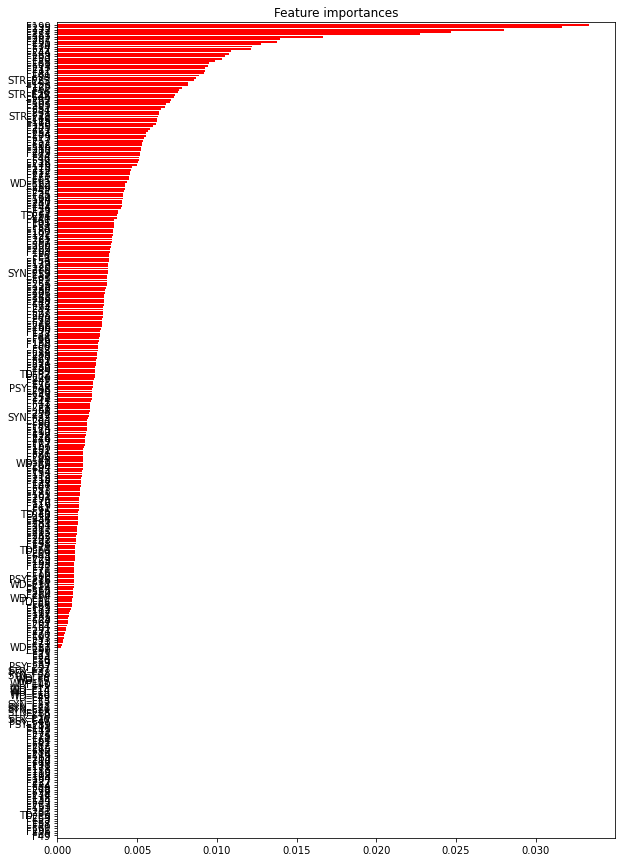

In [65]:
utils.plot_feature_importance(feature_importance, X)

In [66]:
selected_features = feature_importance > 0.005

In [67]:
X = X.T[selected_features].T
print(X.shape)
print(X.columns)

(2000, 58)
Index(['F17', 'F22', 'F31', 'F37', 'F39', 'F44', 'F46', 'F48', 'F50', 'F52',
       'F62', 'F74', 'F84', 'F94', 'F99', 'F103', 'F115', 'F123', 'F126',
       'F130', 'F146', 'F150', 'F155', 'F158', 'F159', 'F162', 'F172', 'F179',
       'F181', 'F187', 'F188', 'F196', 'F199', 'F205', 'F207', 'F210', 'F217',
       'F221', 'F226', 'F231', 'F235', 'F242', 'F244', 'F245', 'F251', 'F252',
       'F255', 'F267', 'F271', 'F279', 'F282', 'F283', 'F284', 'F292', 'F293',
       'STR_F25', 'STR_F28', 'STR_F29'],
      dtype='object')


## Classification

### We decide to use SVM as our final model due to better performance and less variation.

In [68]:
classifier = Classifier('Random Forest', n_estimator=300, max_depth=10)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.642857 | 0.676768 | 0.61     | 0.505263 | 0.630435 | 0.601852 | 0.591398 | 0.59434  | 0.551402 | 0.659091 | 0.60634  |
| recall    | 0.534653 | 0.676768 | 0.592233 | 0.564706 | 0.563107 | 0.585586 | 0.578947 | 0.670213 | 0.678161 | 0.517857 | 0.596223 |
| f1        | 0.583784 | 0.676768 | 0.600985 | 0.533333 | 0.594872 | 0.593607 | 0.585106 | 0.63     | 0.608247 | 0.58     | 0.59867  |
| accuracy  | 0.615    | 0.68     | 0.595    | 0.58     | 0.605    | 0.555    | 0.61     | 0.63     | 0.62     | 0.58     | 0.607    |


In [69]:
classifier = Classifier('SVM' , kernel='rbf', gamma='scale')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.612903 | 0.617647 | 0.621359 | 0.520408 | 0.656566 | 0.647059 | 0.571429 | 0.60177  | 0.554545 | 0.674157 | 0.607784 |
| recall    | 0.564356 | 0.636364 | 0.621359 | 0.6      | 0.631068 | 0.594595 | 0.631579 | 0.723404 | 0.701149 | 0.535714 | 0.623959 |
| f1        | 0.587629 | 0.626866 | 0.621359 | 0.557377 | 0.643564 | 0.619718 | 0.6      | 0.657005 | 0.619289 | 0.597015 | 0.612982 |
| accuracy  | 0.6      | 0.625    | 0.61     | 0.595    | 0.64     | 0.595    | 0.6      | 0.645    | 0.625    | 0.595    | 0.613    |


In [70]:
classifier = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32,4,), activation='relu', solver='adam')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.563218 | 0.584071 | 0.568627 | 0.5      | 0.614583 | 0.639344 | 0.533981 | 0.527778 | 0.519608 | 0.640351 | 0.569156 |
| recall    | 0.485149 | 0.666667 | 0.563107 | 0.576471 | 0.572816 | 0.702703 | 0.578947 | 0.606383 | 0.609195 | 0.651786 | 0.601322 |
| f1        | 0.521277 | 0.622642 | 0.565854 | 0.535519 | 0.592965 | 0.669528 | 0.555556 | 0.564356 | 0.560847 | 0.646018 | 0.583456 |
| accuracy  | 0.55     | 0.6      | 0.555    | 0.575    | 0.595    | 0.615    | 0.56     | 0.56     | 0.585    | 0.6      | 0.5795   |


In [71]:
classifier = Classifier('Naive Bayes')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.589744 | 0.621212 | 0.571429 | 0.411765 | 0.724638 | 0.671642 | 0.606557 | 0.613333 | 0.5      | 0.666667 | 0.597699 |
| recall    | 0.455446 | 0.414141 | 0.31068  | 0.247059 | 0.485437 | 0.405405 | 0.389474 | 0.489362 | 0.37931  | 0.339286 | 0.39156  |
| f1        | 0.513966 | 0.49697  | 0.402516 | 0.308824 | 0.581395 | 0.505618 | 0.474359 | 0.544379 | 0.431373 | 0.449704 | 0.47091  |
| accuracy  | 0.565    | 0.585    | 0.525    | 0.53     | 0.64     | 0.56     | 0.59     | 0.615    | 0.565    | 0.535    | 0.571    |


In [72]:
classifier = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.619565 | 0.647059 | 0.645833 | 0.511111 | 0.666667 | 0.647619 | 0.605769 | 0.584158 | 0.538462 | 0.662921 | 0.612916 |
| recall    | 0.564356 | 0.666667 | 0.601942 | 0.541176 | 0.601942 | 0.612613 | 0.663158 | 0.62766  | 0.643678 | 0.526786 | 0.604998 |
| f1        | 0.590674 | 0.656716 | 0.623116 | 0.525714 | 0.632653 | 0.62963  | 0.633166 | 0.605128 | 0.586387 | 0.587065 | 0.607025 |
| accuracy  | 0.605    | 0.655    | 0.625    | 0.585    | 0.64     | 0.6      | 0.635    | 0.615    | 0.605    | 0.585    | 0.615    |


## Load Test Dataset

In [73]:
embedding_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'embedding_fasttext.csv'), index_col=0)
print(embedding_features_test.head())

         F0        F1        F2        F3  ...      F298      F299  number  label
0 -0.096663 -0.005718 -0.023596 -0.043770  ... -0.023861 -0.068833    1053      0
1 -0.029366  0.042274 -0.020876 -0.020548  ...  0.003890  0.013595    1047      0
2 -0.033550  0.029519 -0.003604 -0.033160  ... -0.009725 -0.002662    1090      0
3 -0.023381  0.013995 -0.005057 -0.012071  ... -0.019597 -0.020837    1084      0
4 -0.010696  0.022952  0.000615 -0.013578  ... -0.013420  0.001759    1127      0

[5 rows x 302 columns]


In [87]:
psychological_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'psychological_features.csv'), index_col=0)
print(psychological_features_test.head())

   PSY_F36  PSY_F37  PSY_F38  PSY_F39  PSY_F47  PSY_F48  number  label
0        1        2        0        2        0        1    1053      0
1       20       43        0        0        0        1    1047      0
2       20       68        0        6        0        3    1090      0
3       48       59        0        2        0        0    1084      0
4       38       79        2        6        0        0    1127      0


In [88]:
structural_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'structural_features.csv'), index_col=0)
print(structural_features_test.head())

   STR_F25  STR_F26    STR_F27  STR_F28  STR_F29  number  label
0        0        1  18.000000      0.0    65.00    1053      0
1        0        2  25.500000      0.0   199.00    1047      0
2        0        5  20.400000      0.0   424.00    1090      0
3        1       11  13.818182      0.0   294.50    1084      0
4        7        7  25.285714      0.0    93.75    1127      0


In [89]:
syntactics_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'syntactics_features.csv'), index_col=0)
print(syntactics_features_test.head())

    SYN_F18   SYN_F19  SYN_F20  SYN_F21  ...  SYN_F23  SYN_F24  number  label
0  0.000000  0.000000    0.000      0.0  ...      0.0      0.0    1053      0
1  0.000000  0.010050    0.000      0.0  ...      0.0      0.0    1047      0
2  0.007075  0.023585    0.000      0.0  ...      0.0      0.0    1090      0
3  0.010187  0.018676    0.000      0.0  ...      0.0      0.0    1084      0
4  0.002667  0.009333    0.004      0.0  ...      0.0      0.0    1127      0

[5 rows x 9 columns]


In [90]:
text_dependent_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'text_dependent_features.csv'), index_col=0)
print(text_dependent_features_test.head())

   TD_F1     TD_F2  TD_F49  TD_F3     TD_F4  TD_F5     TD_F6  number  label
0     65  0.276923      18      1  0.215385    0.0  0.000000    1053      0
1    199  0.125628      25      0  0.180905    0.0  0.030151    1047      0
2    424  0.068396      29      7  0.214623    0.0  0.009434    1090      0
3    589  0.047538      28      7  0.207131    0.0  0.018676    1084      0
4    750  0.042667      32     16  0.181333    0.0  0.016000    1127      0


In [91]:
word_dependent_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'word_dependent_features.csv'), index_col=0)
print(word_dependent_features_test.head())

   WD_F7     WD_F8     WD_F9    WD_F10  ...       WD_F17    WD_F50  number  label
0     18  3.611111  0.833333  0.500000  ...  2167.778818  2.630253    1053      0
1     51  3.901961  0.745098  0.588235  ...  2988.187481  3.422026    1047      0
2    102  4.156863  0.745098  0.598039  ...  2343.319559  4.168859    1090      0
3    152  3.875000  0.611842  0.572368  ...  2224.861374  4.239969    1084      0
4    177  4.237288  0.593220  0.576271  ...  1646.956733  4.417753    1127      0

[5 rows x 14 columns]


In [ ]:
grammatical_features_test = pd.read_csv(os.path.join(data_path.DATA_PATH, 'test', 'grammatical_features.csv'), index_col=0)
print(grammatical_features_test.head())

## Generate Test Features

In [92]:
features_list_test = [embedding_features_test, psychological_features_test, structural_features_test, 
                      syntactics_features_test, text_dependent_features_test, word_dependent_features_test]
features_test = features_list_test.pop()
for feature_test in features_list_test:
  features_test = pd.merge(features_test, feature_test, left_on=['label', 'number'], right_on=['label', 'number'])

print(features_test.head())
print(features_test.shape)

   WD_F7     WD_F8     WD_F9    WD_F10  ...  TD_F3     TD_F4  TD_F5     TD_F6
0     18  3.611111  0.833333  0.500000  ...      1  0.215385    0.0  0.000000
1     51  3.901961  0.745098  0.588235  ...      0  0.180905    0.0  0.030151
2    102  4.156863  0.745098  0.598039  ...      7  0.214623    0.0  0.009434
3    152  3.875000  0.611842  0.572368  ...      7  0.207131    0.0  0.018676
4    177  4.237288  0.593220  0.576271  ...     16  0.181333    0.0  0.016000

[5 rows x 339 columns]
(378, 339)


## Split X, y

In [93]:
y_test = features_test['label']
X_test = features_test.drop(['label', 'number'], axis=1)

## Normalize



In [94]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Use Selected Features

In [95]:
X_test = X_test.T[selected_features].T
print(X_test.shape)
print(X_test.columns)

(378, 58)
Index(['F17', 'F22', 'F31', 'F37', 'F39', 'F44', 'F46', 'F48', 'F50', 'F52',
       'F62', 'F74', 'F84', 'F94', 'F99', 'F103', 'F115', 'F123', 'F126',
       'F130', 'F146', 'F150', 'F155', 'F158', 'F159', 'F162', 'F172', 'F179',
       'F181', 'F187', 'F188', 'F196', 'F199', 'F205', 'F207', 'F210', 'F217',
       'F221', 'F226', 'F231', 'F235', 'F242', 'F244', 'F245', 'F251', 'F252',
       'F255', 'F267', 'F271', 'F279', 'F282', 'F283', 'F284', 'F292', 'F293',
       'STR_F25', 'STR_F28', 'STR_F29'],
      dtype='object')


### Fit Model

In [99]:
classifier = Classifier('SVM' , kernel='rbf', gamma='scale')
classifier.fit(X, y)

array([[0.36000697, 0.63999303],
       [0.65674039, 0.34325961],
       [0.39915645, 0.60084355],
       ...,
       [0.4696863 , 0.5303137 ],
       [0.56928967, 0.43071033],
       [0.33560013, 0.66439987]])

## Prediction on Testset

In [103]:
test_predictions = classifier.predict(X_test)
test_prediction_labels = np.array(test_predictions[:,1] > 0.5, dtype=int)

print(accuracy_score(y_test, test_prediction_labels))

0.5793650793650794


## Ensenble Method

## Explorary Idea: Use ensenble idea on all sklearn models and suggest label with maximum occurance.

In [104]:
svm = Classifier('SVM' , kernel='rbf', gamma='auto', probability=True)
train_predictions_svm = svm.fit(X, y)

In [105]:
rf = Classifier('Random Forest', n_estimator=200, max_depth=10)
train_predictions_rf = rf.fit(X, y)

In [106]:
mlp = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32, 4,), activation='relu', solver='adam')
train_predictions_mlp = mlp.fit(X, y)

In [107]:
adaboost = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
train_predictions_adaboost = adaboost.fit(X, y)

In [108]:
nb = Classifier('Naive Bayes')
train_predictions_nb = nb.fit(X, y)

In [109]:
threshold = 0.5

train_prediction_labels_svm = np.array(train_predictions_svm[:,1] > threshold, dtype=int)
train_prediction_labels_rf = np.array(train_predictions_rf[:,1] > threshold, dtype=int)
train_prediction_labels_mlp = np.array(train_predictions_mlp[:,1] > threshold, dtype=int)
train_prediction_labels_ad = np.array(train_predictions_adaboost[:,1] > threshold, dtype=int)
train_prediction_labels_nb = np.array(train_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(train_prediction_labels_svm)):
    lsts.append(
        [
            train_prediction_labels_svm[i],
            train_prediction_labels_rf[i],
            train_prediction_labels_mlp[i],
            train_prediction_labels_ad[i],
            train_prediction_labels_nb[i]
        ]
    )

y_train_pred = [ max(lst, key=lst.count) for lst in lsts]

In [113]:
print(classification_report(y, y_train_pred))
print(accuracy_score(y, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1000
           1       0.93      0.81      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000

0.8735


In [118]:
test_predictions_svm = rf.predict(X_test)
test_predictions_rf = svm.predict(X_test)
test_predictions_ad = adaboost.predict(X_test)
test_predictions_nb = nb.predict(X_test)
test_predictions_mlp = mlp.predict(X_test)

test_prediction_labels_svm = np.array(test_predictions_svm[:,1] > threshold, dtype=int)
test_prediction_labels_rf = np.array(test_predictions_rf[:,1] > threshold, dtype=int)
test_prediction_labels_mlp = np.array(test_predictions_mlp[:,1] > threshold, dtype=int)
test_prediction_labels_ad = np.array(test_predictions_ad[:,1] > threshold, dtype=int)
test_prediction_labels_nb = np.array(test_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(test_prediction_labels_svm)):
    lsts.append(
        [
            test_prediction_labels_svm[i],
            test_prediction_labels_rf[i],
            test_prediction_labels_mlp[i],
            test_prediction_labels_ad[i],
            test_prediction_labels_nb[i]
        ]
    )

y_test_pred = [ max(lst, key=lst.count) for lst in lsts]

In [119]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       189
           1       0.60      0.60      0.60       189

    accuracy                           0.60       378
   macro avg       0.60      0.60      0.60       378
weighted avg       0.60      0.60      0.60       378

0.5978835978835979
